## Practical Business Analytics Coursework   

Focused on building a machine learning model to predict the likelihood of a stroke occurrence based on various health-related features, using a Fedforward neural network and XGBoost model for classification and evaluating its performance through various metrics, including accuracy, precision, recall, F1 score, mcc, confusion matrix and AUC-ROC.

# FNN Model For Stroke Prediction

### Step 1: Importing Libraries and Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Loading and Inspecting the Dataset

In [40]:
# Load the dataset
data_path = 'data_stroke_undersampled.csv'
df = pd.read_csv(data_path)

# Inspect the data
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0_10               1456 non-null   int64  
 1   11_20              1456 non-null   int64  
 2   21_30              1456 non-null   int64  
 3   31_40              1456 non-null   int64  
 4   41_50              1456 non-null   int64  
 5   51_60              1456 non-null   int64  
 6   61_70              1456 non-null   int64  
 7   71_80              1456 non-null   int64  
 8   81_and_above       1456 non-null   int64  
 9   age                1456 non-null   int64  
 10  gender             1456 non-null   int64  
 11  hypertension       1456 non-null   int64  
 12  heart_disease      1456 non-null   int64  
 13  ever_married       1456 non-null   int64  
 14  Residence_type     1456 non-null   int64  
 15  avg_glucose_level  1456 non-null   float64
 16  bmi       

### Step 3: Data Preprocessing

In [43]:
# Handle missing values
df = df.dropna()

# Separate features and target
target_column = 'stroke'  # our target variable is stroke
X = df.drop(columns=[target_column])  # all collumns except stroke 
y = df[target_column]  

# Encode the target variable
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)  # Convert categorical target to numeric


### Step 4: Train-Test Split and Feature Scaling

In [46]:
# Split into train and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  


### Step 5: Model Selection and Training

In [49]:
from tensorflow.keras.layers import Input

# Build a Feedforward Neural Network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define input shape
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu',),  # Second hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification (0 or 1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs if no improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,  # Maximum epochs
    batch_size=34,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stopping],  # Include early stopping callback
    verbose=1  # Print progress
)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6480 - loss: 0.6458 - val_accuracy: 0.7500 - val_loss: 0.5549
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7504 - loss: 0.5148 - val_accuracy: 0.7451 - val_loss: 0.5317
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7786 - loss: 0.4597 - val_accuracy: 0.7549 - val_loss: 0.5261
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7735 - loss: 0.4601 - val_accuracy: 0.7598 - val_loss: 0.5174
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7541 - loss: 0.4605 - val_accuracy: 0.7696 - val_loss: 0.5096
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.4201 - val_accuracy: 0.7549 - val_loss: 0.5046
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.4111 - val_accuracy: 0.7647 - val_loss: 0.4965
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss: 0.4342 - val_accuracy: 0.7696 - val_loss

### Step 6: Model Evaluation

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score

# Get class predictions (binary: 0 or 1) for classification metrics
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get predicted probabilities for AUC-ROC (continuous values between 0 and 1)
y_pred_prob = model.predict(X_test)

# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=['Class 0 (No Stroke)', 'Class 1 (Stroke)'], output_dict=True)

# Extract metrics for each class
class_0_metrics = report['Class 0 (No Stroke)']
class_1_metrics = report['Class 1 (Stroke)']

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display metrics for each class
print("\nMetrics for Class 0 (No Stroke):")
print(f"Precision: {class_0_metrics['precision']:.2f}")
print(f"Recall: {class_0_metrics['recall']:.2f}")
print(f"F1 Score: {class_0_metrics['f1-score']:.2f}")

print("\nMetrics for Class 1 (Stroke):")
print(f"Precision: {class_1_metrics['precision']:.2f}")
print(f"Recall: {class_1_metrics['recall']:.2f}")
print(f"F1 Score: {class_1_metrics['f1-score']:.2f}")

# Compute MCC for each class
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
mcc_class_1 = matthews_corrcoef(y_test, y_pred)  # MCC for Class 1
print(f"\nMCC for Class 1 (Stroke): {mcc_class_1:.2f}")

# AUC-ROC for each class
auc_class_0 = roc_auc_score(1 - y_test, y_pred_prob)  # AUC for Class 0
auc_class_1 = roc_auc_score(y_test, y_pred_prob)      # AUC for Class 1

print(f"AUC-ROC for Class 1 (Stroke): {auc_class_1:.2f}")

# Confusion Matrix (printed in a more readable way)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"True Negative (Class 0): {conf_matrix[0][0]}")
print(f"False Positive (Class 0): {conf_matrix[0][1]}")
print(f"False Negative (Class 1): {conf_matrix[1][0]}")
print(f"True Positive (Class 1): {conf_matrix[1][1]}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.81

Metrics for Class 0 (No Stroke):
Precision: 0.86
Recall: 0.75
F1 Score: 0.80

Metrics for Class 1 (Stroke):
Precision: 0.77
Recall: 0.87
F1 Score: 0.82

MCC for Class 1 (Stroke): 0.62
AUC-ROC for Class 1 (Stroke): 0.88

Confusion Matrix:
True Negative (Class 0): 167
False Positive (Class 0): 57
False Negative (Class 1): 27
True Positive (Class 1): 186


### Step 7: Confusion Matrix


Confusion Matrix:
[[167  57]
 [ 27 186]]


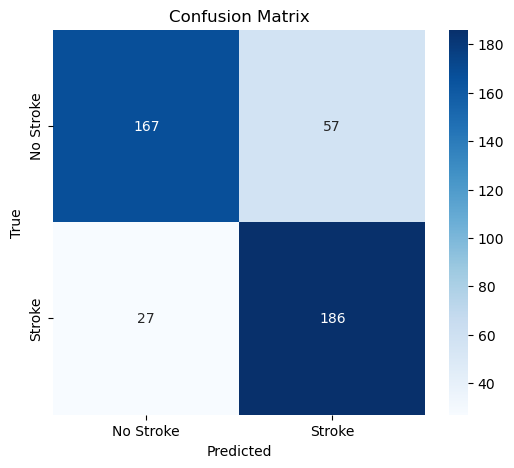

In [55]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Step 8: Plotting AUC-ROC Curve

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


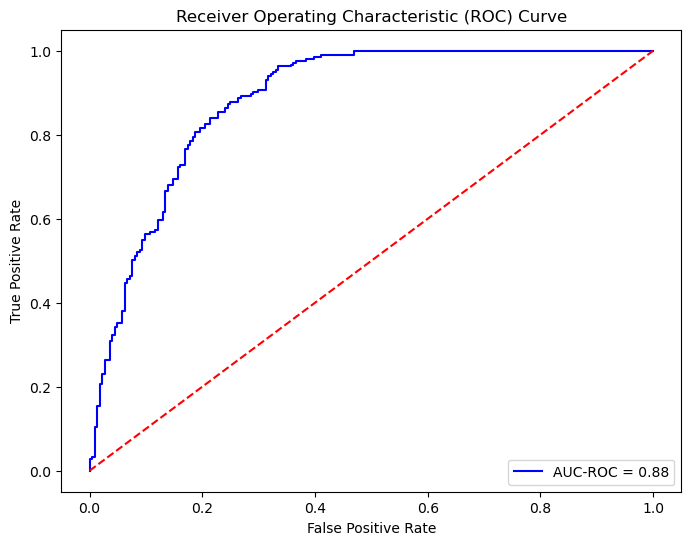

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (stroke)
y_pred_prob = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line of no-discrimination
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Step 9: Plotting Accuracy Over Epochs

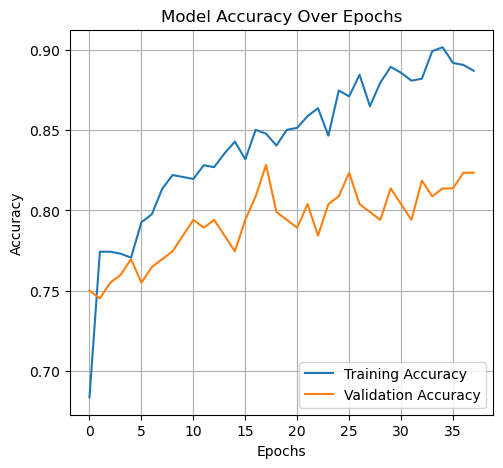

In [58]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()


# XGBoost Model

### Step 1: Importing Libraries and Loading the Dataset

In [5]:
import pandas as pd     # For data manipulation and loading the dataset
import matplotlib.pyplot as plt     # For plotting the ROC curve
from sklearn.model_selection import train_test_split, GridSearchCV     # Provides tools to split the dataset and perform grid search
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix    # To evaluate classification models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, matthews_corrcoef
from xgboost import XGBClassifier     # For XGBoost algorithm
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Step 2: Loading and Inspecting the Dataset

In [8]:
# Load the dataset
data_path = 'data_stroke_undersampled.csv'
df = pd.read_csv(data_path)

# Inspect the data
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0_10               1456 non-null   int64  
 1   11_20              1456 non-null   int64  
 2   21_30              1456 non-null   int64  
 3   31_40              1456 non-null   int64  
 4   41_50              1456 non-null   int64  
 5   51_60              1456 non-null   int64  
 6   61_70              1456 non-null   int64  
 7   71_80              1456 non-null   int64  
 8   81_and_above       1456 non-null   int64  
 9   age                1456 non-null   int64  
 10  gender             1456 non-null   int64  
 11  hypertension       1456 non-null   int64  
 12  heart_disease      1456 non-null   int64  
 13  ever_married       1456 non-null   int64  
 14  Residence_type     1456 non-null   int64  
 15  avg_glucose_level  1456 non-null   float64
 16  bmi       

### Step 3: Separating Features and Target 

In [11]:
X = df.drop(columns=['stroke'])     # All columns except stroke 
y = df['stroke']     # Represents the label for classification 


### Step 4: Splitting the Dataset

In [14]:
# train_test_split: Splits data into training (80%) and testing (20%) sets
# stratify=y: Ensures that the class distribution in y is preserved in both train and test splits.
# random_state=42: Ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 5: Defining the XGBoost Model

In [17]:
# Helps us to initializes the XGBoost classifier.
# eval_metric='logloss': Specifies the evaluation metric (log loss) during training.
# Random_state=42: Ensures reproducibility.
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

### Step 6: Hyperparameter Tuning with Grid Search

In [27]:
param_grid = {     
    'n_estimators': [50, 100, 150],    # Number of trees in the ensemble
    'max_depth': [3, 5, 7],    # Max depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size for weight updates
    'subsample': [0.8, 1.0],    # Fraction of sample used to train each tree
    'colsample_bytree': [0.8, 1.0]    # Fraction of feature used to train each tree
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# define the best_model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


### Step 7: Evaluating the Model

In [31]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    matthews_corrcoef,
    f1_score
)

# Predict the class labels and probabilities
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model")
print(f"Accuracy: {accuracy:.2f}")

# AUC-ROC score (for class 1, stroke)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score (Class 1 - Stroke): {roc_auc:.2f}")

# Extract the confusion matrix and print it
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("\nConfusion Matrix:")
print(f"[[{tn}, {fp}]\n [{fn}, {tp}]]")

# Metrics for Class 0
precision_class_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_class_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_class_0 = f1_score(1 - y_test, 1 - y_pred)  # F1 score for Class 0
print(f"\nMetrics for Class 0 (No Stroke):")
print(f"Precision: {precision_class_0:.2f}")
print(f"Recall: {recall_class_0:.2f}")
print(f"F1 Score: {f1_class_0:.2f}")

# Metrics for Class 1
precision_class_1 = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_class_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_class_1 = f1_score(y_test, y_pred)  # F1 score for Class 1
print(f"\nMetrics for Class 1 (Stroke):")
print(f"Precision: {precision_class_1:.2f}")
print(f"Recall: {recall_class_1:.2f}")
print(f"F1 Score: {f1_class_1:.2f}")

# Calculate MCC (Matthews Correlation Coefficient) for class 1 (Stroke)
mcc_class_1 = matthews_corrcoef(y_test, y_pred)
print(f"\nMCC for Class 1 (Stroke): {mcc_class_1:.2f}")


XGBoost Model
Accuracy: 0.88
ROC AUC Score (Class 1 - Stroke): 0.93

Confusion Matrix:
[[117, 29]
 [7, 139]]

Metrics for Class 0 (No Stroke):
Precision: 0.94
Recall: 0.80
F1 Score: 0.87

Metrics for Class 1 (Stroke):
Precision: 0.83
Recall: 0.95
F1 Score: 0.89

MCC for Class 1 (Stroke): 0.76


### Step 8: Creating confusion matrix

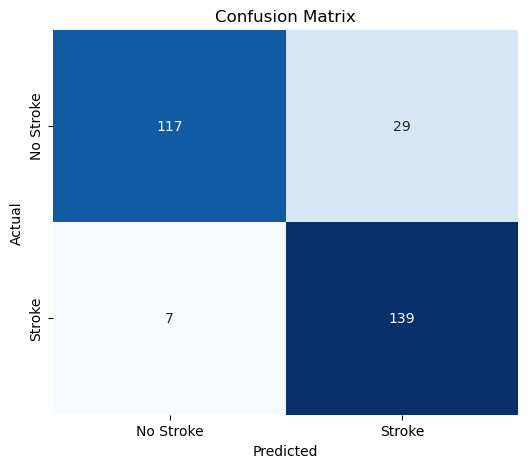


Confusion Matrix:
True Negative (Class 0 - No Stroke): 117
False Positive (Class 0 - No Stroke): 29
False Negative (Class 1 - Stroke): 7
True Positive (Class 1 - Stroke): 139


In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Confusion Matrix values
tn, fp, fn, tp = conf_matrix.ravel()
print("\nConfusion Matrix:")
print(f"True Negative (Class 0 - No Stroke): {tn}")
print(f"False Positive (Class 0 - No Stroke): {fp}")
print(f"False Negative (Class 1 - Stroke): {fn}")
print(f"True Positive (Class 1 - Stroke): {tp}")

### Step 9: Plotting the ROC Curve

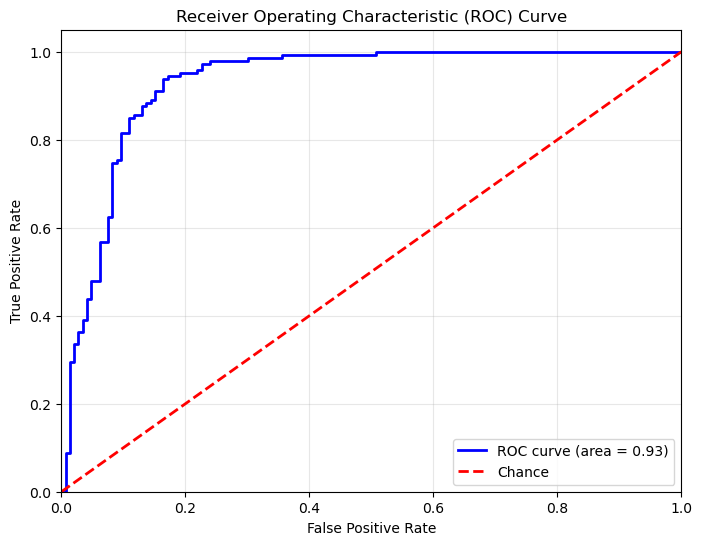

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Step 10: Finding the 10 most important features to determine a stroke 

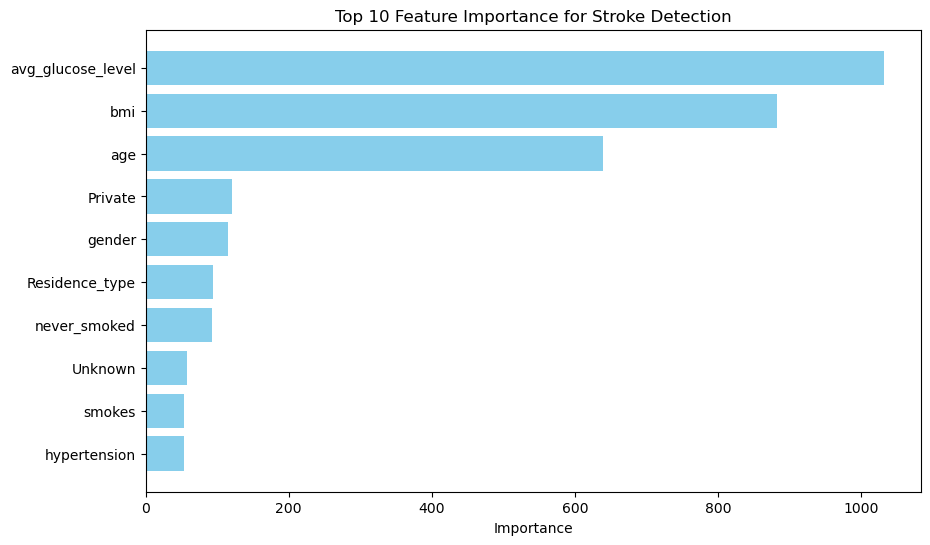

In [41]:
# Get feature importance scores
importance = best_model.get_booster().get_score(importance_type='weight')

# Convert importance to DataFrame for easier plotting
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 features
plt.figure(figsize=(10,6))
plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance for Stroke Detection')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()